# Unit 4 - Noisy data
---
1. [Histograms](#section1)
2. [Standard deviation](#section2)
3. [Boxplots](#section3)


In [1]:
import pandas as pd
import numpy as np

<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [3]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [4]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [5]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(7)

,height_f,height_m
0,176,185
1,170,172
2,172,172
3,179,169
4,177,181
5,163,162
6,172,186


To begin with - why a histogram?

This is what happens if we just plot lines:

<AxesSubplot:>

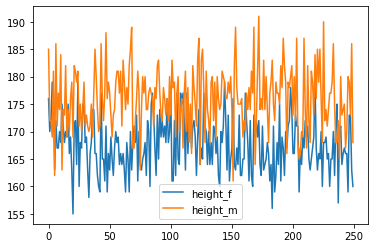

In [6]:
gym.plot()

Ummm.. it's very messy. 

#### Different histograms:

In [ ]:
gym.hist('height_f')

In [ ]:
gym.hist(bins=5)

In [ ]:
gym.plot.hist(bins=20)

In [ ]:
gym.plot.hist(bins=20, alpha=0.7)

---
#### Back to our vaccinations data:

In [ ]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

#### Look at data for different countries
#### Use `groupby()` to group according to location

#### Attempt #1 - what is wrong?

In [ ]:
vacc_df.groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

#### Attempt #2 

#### Is this better?

In [ ]:
vacc_df.fillna('0').groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

#### Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [ ]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [16]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [ ]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

#### sort the values using 'sort_values()`

In [ ]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(10)

#### Histogram according to all values:

In [ ]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

In [ ]:
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

#### Remove rows with 0's

Note that this is different than changing values to 0's

In [ ]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>#### Your turn:
>
>Do the same, but for another column
---


---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [ ]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

In [ ]:
df.mean()

In [ ]:
df.std()

<a id='section2'></a>

### 3. Boxplots

In [ ]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df.head()

In [ ]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

In [ ]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [ ]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


This doesn't seem to fit
https://ourworldindata.org/grapher/covid-vaccination-doses-per-capita

Is this an error???